## M3C 2017 Lab 3 Solution

### Task 1: Barabasi-Albert network

The Barabasi-Albert model for complex networks is based on the idea that networks evolve over time and that new nodes are more likely to link to high-degree nodes. It is (probably) the single-most important model in the field of network science as it reproduces several important qualitative features seen in large complex real-world networks.
In this task, you will use NetworkX to generate B-A networks and investigate their properties.

1) The B-A model requires two input parameters: the total number of nodes (*N*), and the number of links, *L*,  added between a new node and the existing network upon its introduction. Use the function *nx.barabasi_albert_graph* to generate a B-A graph with *N=500* and *L=4*. Draw your graph (with node_size=6) and zoom into the figure and look around -- do you see any hubs?

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


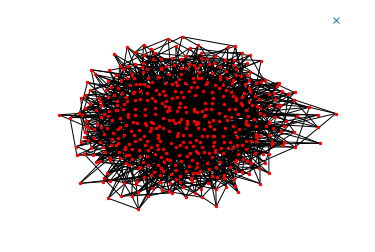

In [3]:
import networkx as nx
%pylab inline
G = nx.barabasi_albert_graph(500,4)
figure()
plot(1,1,'x')
nx.draw(G,node_size=6)

2) Now, generate a B-A graph with *N=5000*, *L=4*, and an Erdos-Renyi (GNP) graph with *N=5000* and *P=0.002*.
Compute the degree distributions for these graphs and plot them on a log-log plot.

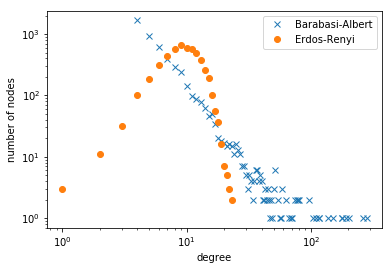

In [4]:
BA = nx.barabasi_albert_graph(5000,4)
ER = nx.gnp_random_graph(5000,0.002)
figure()
D_BA = nx.degree_histogram(BA)
D_ER = nx.degree_histogram(ER)
figure()
loglog(D_BA,'x')
loglog(D_ER,'o')
xlabel('degree')
ylabel('number of nodes')
legend(('Barabasi-Albert','Erdos-Renyi'))


3) The global clustering coefficient, *C*, is the average of the clustering coefficients of each node in a network and can be computed with *nx.cluster.average_clustering*. Compute and compare *C* for the E-R and B-A graphs.

In [5]:
C_ER = nx.cluster.average_clustering(ER)
C_BA = nx.cluster.average_clustering(BA)
print("E-R graph, C=",C_ER)
print("B-A graph, C=",C_BA)


E-R graph, C= 0.0019863469554928727
B-A graph, C= 0.01265660005978573


### Task 2: Constrained optimization

In lecture 6, we applied unconstrained-optimization methods to find the minimum of a 2-D Gaussian, $$F(x,y) = exp[-\alpha (x-x_0)^2 -\beta (y-y_0)^2] \\ $$ In this exercise, you will solve this optimization problem subject to the *equality* constraint, $y = sin(x)$

1) First, we introduce python functions for the cost function, and its gradient (identical to gauss2d.py):

In [6]:
#objective function
def gauss2d(xf,x0,y0,a,b):
    """Compute 2d gaussian function, exp(-a*(x-x0)^2-b*(y-y0)^2)
    x = xf[0], y = xf[1]
    """
    x = xf[0]
    y = xf[1]

    return -np.exp(-a*(x-x0)**2 - b*(y-y0)**2)


#gradient of objective function
def gauss2d_grad(xf,x0,y0,a,b):
    """Compute gradietn of 2d gaussian function
    defined in gauss2d. Returns two-element tuple
    containing (df/dx,df/dy)
    """

    #compute function
    f = gauss2d(xf,x0,y0,a,b)

    x = xf[0]
    y = xf[1]

    return np.array([-2.0*a*(x-x0)*f,-2.0*b*(y-y0)*f])

2) The equality constraint has to be specified in a function, complete the function below to return $y-sin(x)$.

In [7]:
def econstraint(U):
    """U is a two-element tuple
       containing x and y"""
    #add return statement
    return U[1]-sin(U[0])

3) The code below sets up the parameters of the problem, and defines the dictionary, *cons*, which should be provided as input to *minimize*. Note that inequality constraints can be set up in a similar manner with 'type':'ineq'

In [8]:
from scipy.optimize import minimize
xguess = (2,sin(2))
parameters = (1.0,3.0,1.0,1.0) #x0,y0,a,b
cons = ({'type':'eq','fun':econstraint}) #equality constraint


4) Uncomment the code below and complete the call to *minimize* so that it uses *cons* and the *SLSQP* method

In [9]:
# result = minimize(gauss2d,xguess,args=parameters, #add code here)
result = minimize(gauss2d,xguess,args=parameters,method='SLSQP',jac=gauss2d_grad,constraints=cons)
x,y=result.x[0],result.x[1] #extract location of optimum from result

The code below will display the Gaussian, the constraint, and the solution

In [12]:
#display objective
def display_gauss2d(args):
    """display objective functions and curve indicating 
    equality (green) constraints"""

    from matplotlib import colors

    x0,y0,a,b=args
    
    x = np.linspace(-5+x0,5+x0,101)
    y = np.linspace(-5+y0,5+y0,101)
    
    xg,yg=np.meshgrid(x,y)
    xf = (xg,yg)
 
    f = gauss2d(xf,x0,y0,a,b)
    
    plt.figure()
    V = np.logspace(-6,0,20)
    plt.contour(xg,yg,-f,V,norm=colors.LogNorm())
    plt.plot(x,np.sin(x),'g--')
    plt.axis([x0-5,x0+5,y0-5,y0+5])
    plt.legend(("equality constraint",""),loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')                            


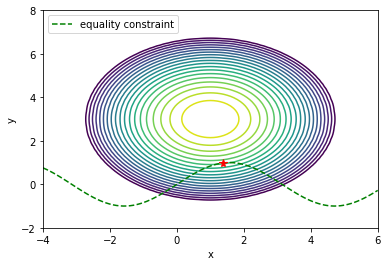

In [13]:
display_gauss2d(parameters)
plot(x,y,'r*',markersize=8)